In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import kagglehub
from kagglehub import KaggleDatasetAdapter

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_path = "train_energy_data.csv"
# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "govindaramsriram/energy-consumption-dataset-linear-regression",
  file_path,
)


file_path = "test_energy_data.csv"
df_teste = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "govindaramsriram/energy-consumption-dataset-linear-regression",
  file_path,
)

colors = ["#0a4f00","#407c0a","#71ac3f","#a2de6e","#d5ff9e","#d2ca5d","#8f5547"]

In [3]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [4]:
### Checking for empty and NaN values
df.info(), df.isna().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


(None,
 Building Type  Square Footage  Number of Occupants  Appliances Used  Average Temperature  Day of Week  Energy Consumption
 False          False           False                False            False                False        False                 1000
 Name: count, dtype: int64)

In [5]:
df_teste["Building Type"].unique(), df_teste["Day of Week"].unique()

(array(['Residential', 'Commercial', 'Industrial'], dtype=object),
 array(['Weekday', 'Weekend'], dtype=object))

In [6]:
### Creating categoric variables for the Building Type and Day of Week.

buildingtype = {'Residential': 0, 'Commercial': 1, 'Industrial': 2} ### Residential = 0, Commercial = 1, Industrial = 2
df["Building Type"] = df["Building Type"].map(buildingtype)

dow = {"Weekday": 0, "Weekend": 1} ### Weekday = 0, Weekend = 1
df["Day of Week"] = df["Day of Week"].map(dow)
df_teste["Building Type"] = df_teste["Building Type"].map(buildingtype)
df_teste["Day of Week"] = df_teste["Day of Week"].map(dow)



In [7]:
columns = df.drop(columns= ["Building Type", "Day of Week"], axis = 1).columns

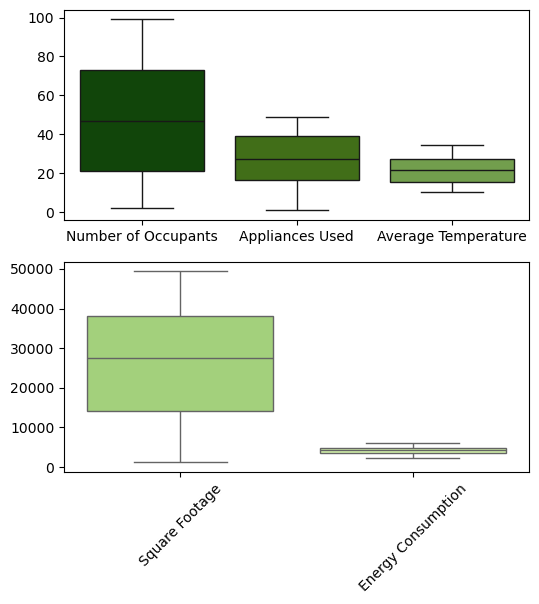

In [8]:
fig, ax = plt.subplots(2,figsize = (6,6))
sns.boxplot(df_teste[['Number of Occupants','Appliances Used', 'Average Temperature']], ax = ax[0], palette = [colors[0],colors[1],colors[2]])
sns.boxplot(df_teste[['Square Footage', 'Energy Consumption']], ax = ax[1], palette = [colors[3],colors[4]])
plt.xticks(rotation = 45)
plt.show()

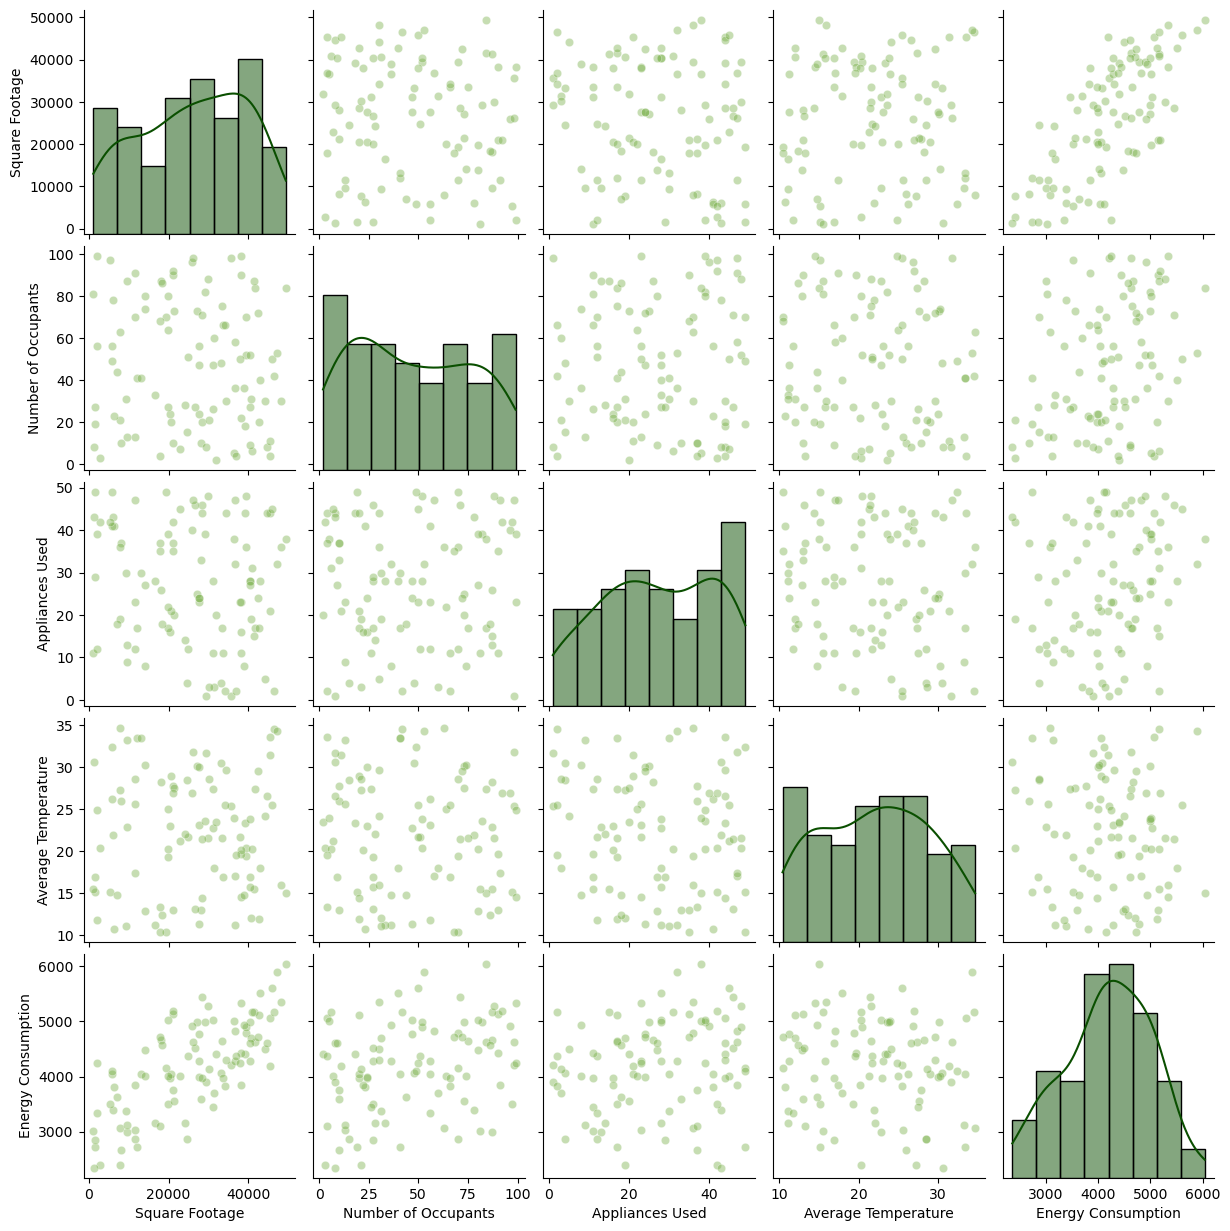

In [9]:
### Looking correlation between variables and their distribuction (Numerical Ones)
sns.pairplot(data = df_teste,
             x_vars = columns,
             y_vars = columns,
             kind = "scatter",
             plot_kws={'alpha': 0.4, "color": colors[2]},
             diag_kws={'kde': True, "color": colors[0]},
            )
plt.show()

C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_14688\2578742171.py:2: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(x="Building Type", data = df_teste, palette = colors, orient ="v")


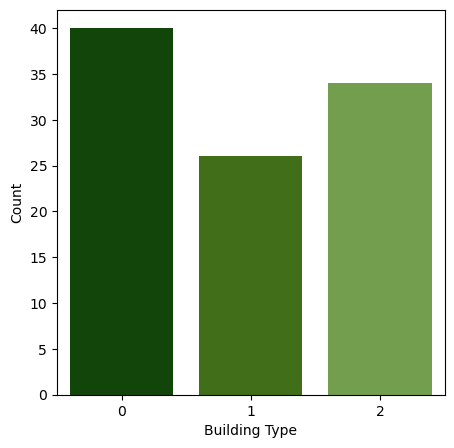

In [10]:
fig, axs = plt.subplots(figsize = (5,5))
sns.countplot(x="Building Type", data = df_teste, palette = colors, orient ="v")
plt.ylabel("Count")
plt.show()

C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_14688\1553802855.py:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x="Day of Week", data = df_teste, palette = colors, orient ="v")


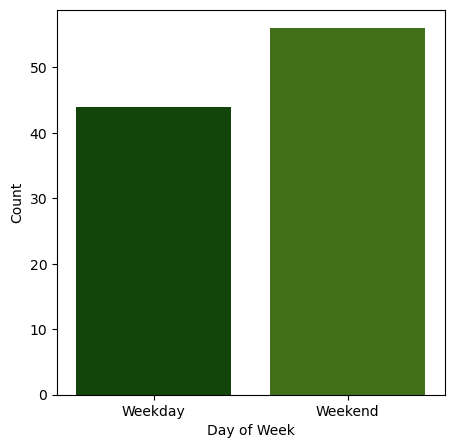

In [11]:
fig, axs = plt.subplots(figsize = (5,5))
sns.countplot(x="Day of Week", data = df_teste, palette = colors, orient ="v")
plt.xticks([0,1],['Weekday', 'Weekend'])
plt.ylabel("Count")
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Building Type'),
  Text(1.5, 0, 'Square Footage'),
  Text(2.5, 0, 'Number of Occupants'),
  Text(3.5, 0, 'Appliances Used'),
  Text(4.5, 0, 'Average Temperature'),
  Text(5.5, 0, 'Day of Week'),
  Text(6.5, 0, 'Energy Consumption')])

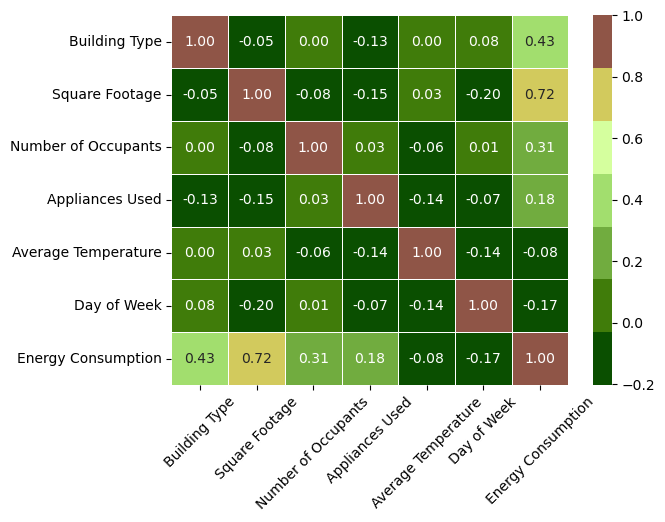

In [12]:
### Seeking for correlations:

sns.heatmap(df_teste.corr(), annot = True,cmap = colors,fmt='.2f', cbar = True, lw = 0.5,linecolor = "white")
plt.xticks(rotation = 45)

# Applying the model

In [13]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,7063,76,10,29.84,0,2713.95
1,1,44372,66,45,16.72,0,5744.99
2,2,19255,37,17,14.30,1,4101.24
3,0,13265,14,41,32.82,0,3009.14
4,1,13375,26,18,11.92,0,3279.17


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X = df.drop(columns = "Energy Consumption", axis = 1)
X_teste = df_teste.drop(columns = "Energy Consumption", axis = 1)
y = df["Energy Consumption"]
y_teste = df_teste["Energy Consumption"]

In [15]:
model = LinearRegression()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, random_state = 42)

model.fit(X_train,y_train)

y_pred = model.predict(X = X_teste)
a, b = [model.coef_, model.intercept_]
[a,b]

[array([ 5.00000216e+02,  4.99999884e-02,  1.00000039e+01,  2.00000189e+01,
        -5.00007594e+00, -5.00008132e+01]),
 np.float64(1550.0015474907373)]

In [17]:
### Seing the model quality

print(f"R^2 = {skt.metrics.r2_score(y_test, y_pred)}")
print(f"The mean absolute error is {skt.metrics.mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percent error is {skt.metrics.mean_absolute_percentage_error(y_test, y_pred)}")
print(f"The mean squared error is {skt.metrics.mean_squared_error(y_test, y_pred)}")
print(f"The root mean squared error is {np.sqrt(skt.metrics.mean_squared_error(y_test, y_pred))}")

R^2 = -0.6545867225996509
The mean absolute error is 943.0411547537137
The mean absolute percent error is 0.24895096419267468
The mean squared error is 1423683.9105437207
The root mean squared error is 1193.182262080576


In [18]:
residuals = y_test - y_pred

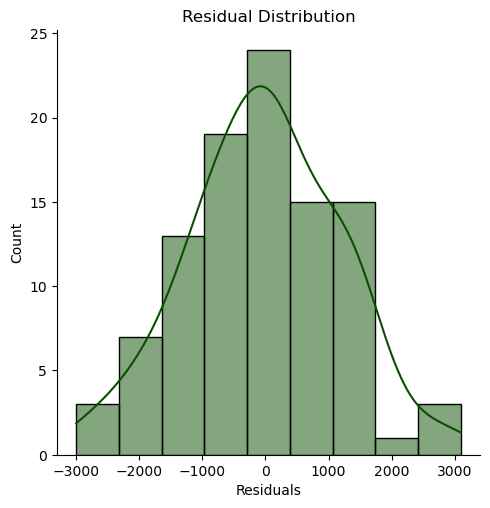

In [19]:
sns.displot(residuals, kde = True, color = colors[0])
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

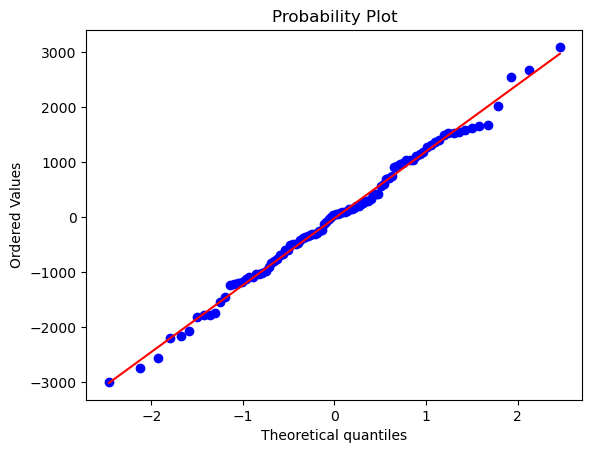

In [20]:
### Shapiro-Wilk test checking the normality of the residuals
from scipy.stats import shapiro
from scipy.stats import probplot

probplot(residuals, dist = "norm", plot = plt)
plt.show()

In [21]:
shapiro(residuals)

ShapiroResult(statistic=np.float64(0.9938405952370423), pvalue=np.float64(0.9332012324314154))